# <center>Day 7</center>

In [1]:
from os import listdir

print(listdir('./data/'))

['cmpdata1.csv', 'cmpdata2.csv', 'empdata11.csv', 'empdata12.csv', 'employees.csv', 'Humidity1.csv', 'test.csv', 'train.csv']


In [2]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('./data/cmpdata1.csv')
df2 = pd.read_csv('./data/cmpdata2.csv')

print(df1.head(),'\n\n')
print(df2.head())

# np.set_printoptions(threshold=)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

         rank  infra1  energy1  FMCG  bfsi1  defense1
tata        a     100      101   102    265       104
RELIANCE    b     110      111   277    113       114
wipro       c     120      121   122    255       124 


         rank  bfsi2  it2  FMCG  mining2
infy        d    255  256   257      258
RELIANCE    b    275  276   277      278
adani       a    265  266   267      268


## Concat 

In [3]:
dfc = pd.concat([df1, df2],axis=0,join="outer",sort=False)
print(dfc)

         rank  infra1  energy1  FMCG  bfsi1  defense1  bfsi2    it2  mining2
tata        a   100.0    101.0   102  265.0     104.0    NaN    NaN      NaN
RELIANCE    b   110.0    111.0   277  113.0     114.0    NaN    NaN      NaN
wipro       c   120.0    121.0   122  255.0     124.0    NaN    NaN      NaN
infy        d     NaN      NaN   257    NaN       NaN  255.0  256.0    258.0
RELIANCE    b     NaN      NaN   277    NaN       NaN  275.0  276.0    278.0
adani       a     NaN      NaN   267    NaN       NaN  265.0  266.0    268.0


In [4]:
pd.__version__

'0.25.1'

In [5]:
print(pd.concat([df1,df2], axis=0, join="inner",sort=False))

         rank  FMCG
tata        a   102
RELIANCE    b   277
wipro       c   122
infy        d   257
RELIANCE    b   277
adani       a   267


In [6]:
print(pd.concat([df1,df2], axis=0, join_axes=[df1.columns], sort=False))

         rank  infra1  energy1  FMCG  bfsi1  defense1
tata        a   100.0    101.0   102  265.0     104.0
RELIANCE    b   110.0    111.0   277  113.0     114.0
wipro       c   120.0    121.0   122  255.0     124.0
infy        d     NaN      NaN   257    NaN       NaN
RELIANCE    b     NaN      NaN   277    NaN       NaN
adani       a     NaN      NaN   267    NaN       NaN


c:\users\p s v\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


In [7]:
print(pd.concat([df1,df2],axis=0,join_axes=[df2.columns],keys=["r1","r2"],sort=False))

            rank  bfsi2    it2  FMCG  mining2
r1 tata        a    NaN    NaN   102      NaN
   RELIANCE    b    NaN    NaN   277      NaN
   wipro       c    NaN    NaN   122      NaN
r2 infy        d  255.0  256.0   257    258.0
   RELIANCE    b  275.0  276.0   277    278.0
   adani       a  265.0  266.0   267    268.0


c:\users\p s v\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


In [8]:
print(pd.concat([df1,df2],axis=1,join_axes=[df2.index],keys=["r1","r2"],sort=False))

           r1                                         r2                        
         rank infra1 energy1   FMCG  bfsi1 defense1 rank bfsi2  it2 FMCG mining2
infy      NaN    NaN     NaN    NaN    NaN      NaN    d   255  256  257     258
RELIANCE    b  110.0   111.0  277.0  113.0    114.0    b   275  276  277     278
adani     NaN    NaN     NaN    NaN    NaN      NaN    a   265  266  267     268


c:\users\p s v\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


### Multilevel Indexing

In [9]:
dfk = pd.concat([df1,df2],axis=0,join='outer',keys=['set1','set2'],sort=False)
print(dfk,'\n')
# print(dfk.loc[['set1']],'\n')
print(dfk.loc[[('set1','tata')]])

              rank  infra1  energy1  FMCG  bfsi1  defense1  bfsi2    it2  mining2
set1 tata        a   100.0    101.0   102  265.0     104.0    NaN    NaN      NaN
     RELIANCE    b   110.0    111.0   277  113.0     114.0    NaN    NaN      NaN
     wipro       c   120.0    121.0   122  255.0     124.0    NaN    NaN      NaN
set2 infy        d     NaN      NaN   257    NaN       NaN  255.0  256.0    258.0
     RELIANCE    b     NaN      NaN   277    NaN       NaN  275.0  276.0    278.0
     adani       a     NaN      NaN   267    NaN       NaN  265.0  266.0    268.0 

          rank  infra1  energy1  FMCG  bfsi1  defense1  bfsi2  it2  mining2
set1 tata    a   100.0    101.0   102  265.0     104.0    NaN  NaN      NaN


In [10]:
dfv = pd.concat([df1,df2],axis=1,join="outer",keys=["v1","v2"],sort=False)
print(dfv)

           v1                                         v2                             
         rank infra1 energy1   FMCG  bfsi1 defense1 rank  bfsi2    it2   FMCG mining2
tata        a  100.0   101.0  102.0  265.0    104.0  NaN    NaN    NaN    NaN     NaN
RELIANCE    b  110.0   111.0  277.0  113.0    114.0    b  275.0  276.0  277.0   278.0
wipro       c  120.0   121.0  122.0  255.0    124.0  NaN    NaN    NaN    NaN     NaN
infy      NaN    NaN     NaN    NaN    NaN      NaN    d  255.0  256.0  257.0   258.0
adani     NaN    NaN     NaN    NaN    NaN      NaN    a  265.0  266.0  267.0   268.0


In [11]:
dfv1 = pd.concat([df1,df2],axis=1,join="inner",keys=["v1","v2"],sort=False)
print(dfv1)

           v1                                      v2                        
         rank infra1 energy1 FMCG bfsi1 defense1 rank bfsi2  it2 FMCG mining2
RELIANCE    b    110     111  277   113      114    b   275  276  277     278


In [12]:
dfv0 = pd.concat([df1,df2],axis=1,join_axes=[df1.index],keys=["v1","v2"],sort=False)
print(dfv0)

           v1                                      v2                             
         rank infra1 energy1 FMCG bfsi1 defense1 rank  bfsi2    it2   FMCG mining2
tata        a    100     101  102   265      104  NaN    NaN    NaN    NaN     NaN
RELIANCE    b    110     111  277   113      114    b  275.0  276.0  277.0   278.0
wipro       c    120     121  122   255      124  NaN    NaN    NaN    NaN     NaN


c:\users\p s v\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


In [13]:
print(dfk.loc[[('set1','RELIANCE'),('set2','RELIANCE')],'FMCG'])

set1  RELIANCE    277
set2  RELIANCE    277
Name: FMCG, dtype: int64


In [14]:
print(dfk.iloc[:4])

              rank  infra1  energy1  FMCG  bfsi1  defense1  bfsi2    it2  mining2
set1 tata        a   100.0    101.0   102  265.0     104.0    NaN    NaN      NaN
     RELIANCE    b   110.0    111.0   277  113.0     114.0    NaN    NaN      NaN
     wipro       c   120.0    121.0   122  255.0     124.0    NaN    NaN      NaN
set2 infy        d     NaN      NaN   257    NaN       NaN  255.0  256.0    258.0


In [15]:
print(dfv.loc['RELIANCE',('v1','rank')])

b


## Merge

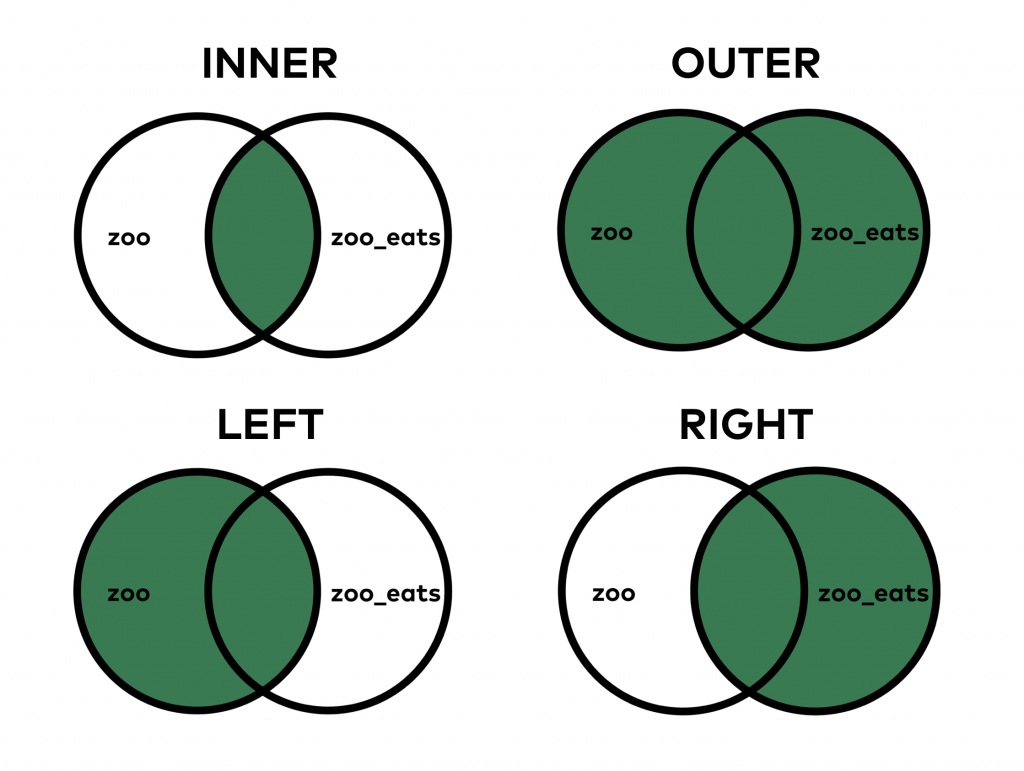

```python
pd.merge(table1, table2, on="", how="")
```

In [16]:
df1 = pd.read_csv('./data/empdata11.csv')
df2 = pd.read_csv('./data/empdata12.csv')

In [17]:
print(df1.head());print()
print(df2.head())

       emp   dept location
0     anil  admin      blr
1     raju    eng      hyd
2    sunil    eng      blr
3  sandeep     hr      del

       emp  start location1
0    vijay   2004       che
1    sunil   2008       blr
2   sachin   2012       mum
3  sandeep   2014       pun


In [18]:
df12 = pd.merge(df1,df2,on="emp",how="inner")
print(df12)

       emp dept location  start location1
0    sunil  eng      blr   2008       blr
1  sandeep   hr      del   2014       pun


In [19]:
df12_o = pd.merge(df1,df2,on="emp",how="outer",indicator=True)
print(df12_o)

       emp   dept location   start location1      _merge
0     anil  admin      blr     NaN       NaN   left_only
1     raju    eng      hyd     NaN       NaN   left_only
2    sunil    eng      blr  2008.0       blr        both
3  sandeep     hr      del  2014.0       pun        both
4    vijay    NaN      NaN  2004.0       che  right_only
5   sachin    NaN      NaN  2012.0       mum  right_only


In [20]:
df12_l = pd.merge(df1,df2,on="emp",how="left",indicator=True)
print(df12_l)

       emp   dept location   start location1     _merge
0     anil  admin      blr     NaN       NaN  left_only
1     raju    eng      hyd     NaN       NaN  left_only
2    sunil    eng      blr  2008.0       blr       both
3  sandeep     hr      del  2014.0       pun       both


In [21]:
df12_r = pd.merge(df1,df2,how="right",on="emp",indicator=True,suffixes=('_left','_right'))

**Cartesian merge**

In [22]:
df_value = pd.merge(df1,df2,how="inner",left_on='location',right_on="location1",indicator=True,suffixes=('_left','_right'))
print(df_value)

  emp_left   dept location emp_right  start location1 _merge
0     anil  admin      blr     sunil   2008       blr   both
1    sunil    eng      blr     sunil   2008       blr   both


In [23]:
df_value = pd.merge(df2,df1,how="inner",left_on="location1",right_on="location",indicator=True,suffixes=('_left','_right'))
print(df_value.head())

  emp_left  start location1 emp_right   dept location _merge
0    sunil   2008       blr      anil  admin      blr   both
1    sunil   2008       blr     sunil    eng      blr   both


In [24]:
df_values = pd.merge(df1,df2,how="outer",left_on="location",right_on="location1",indicator=True,suffixes=('_left','_right'))
print(df_values.head())

  emp_left   dept location emp_right   start location1      _merge
0     anil  admin      blr     sunil  2008.0       blr        both
1    sunil    eng      blr     sunil  2008.0       blr        both
2     raju    eng      hyd       NaN     NaN       NaN   left_only
3  sandeep     hr      del       NaN     NaN       NaN   left_only
4      NaN    NaN      NaN     vijay  2004.0       che  right_only


In [25]:
print(df1.head()); print();print(df2.head())

       emp   dept location
0     anil  admin      blr
1     raju    eng      hyd
2    sunil    eng      blr
3  sandeep     hr      del

       emp  start location1
0    vijay   2004       che
1    sunil   2008       blr
2   sachin   2012       mum
3  sandeep   2014       pun


### SQL reading using pandas

In [26]:
help(pd.read_sql)

Help on function read_sql in module pandas.io.sql:

read_sql(sql, con, index_col=None, coerce_float=True, params=None, parse_dates=None, columns=None, chunksize=None)
    Read SQL query or database table into a DataFrame.
    
    This function is a convenience wrapper around ``read_sql_table`` and
    ``read_sql_query`` (for backward compatibility). It will delegate
    to the specific function depending on the provided input. A SQL query
    will be routed to ``read_sql_query``, while a database table name will
    be routed to ``read_sql_table``. Note that the delegated function might
    have more specific notes about their functionality not listed here.
    
    Parameters
    ----------
    sql : string or SQLAlchemy Selectable (select or text object)
        SQL query to be executed or a table name.
    con : SQLAlchemy connectable (engine/connection) or database string URI
        or DBAPI2 connection (fallback mode)
    
        Using SQLAlchemy makes it possible to use any DB

### Stack function

In [39]:
df2

,emp,start,location1
0,vijay,2004,che
1,sunil,2008,blr
2,sachin,2012,mum
3,sandeep,2014,pun


In [34]:
df1['emp']

,emp,dept,location
0,anil,admin,blr
1,raju,eng,hyd
2,sunil,eng,blr
3,sandeep,hr,del


In [41]:
df2.loc[['emp','location1']]

KeyError: "None of [Index(['emp', 'location1'], dtype='object')] are in the [index]"

In [40]:
df1.join(subset,on="emp",how="inner")

KeyError: "None of [Index(['emp', 'location1'], dtype='object')] are in the [index]"

In [ ]:
import pandas as pd

header = pd.MultiIndex.from_product([['Sem1','Sem2']
                                    ,['3_Months','6_Months']
                                    ,['ML','Python']]
                                   )
print(header)
d = [
    [12,45,67,56,45,34,23,67],
    [78,89,45,23,45,65,34,54],
    [23,45,12,76,22,87,89,56],
    [67,34,12,65,87,90,23,54]
]

df = pd.DataFrame(d,
                index=['James','Anil','Sunil','Smriti'],
                columns=header)

print(df)

In [ ]:
header = pd.MultiIndex.from_product([ ['Sem1','Sem2'], ['A1','A2'] ])

# header
test = pd.DataFrame(d,index=header,columns=range(8))
print(test)
test.unstack(level=0)

In [ ]:
print(df.columns)

In [ ]:
print(df.index)

In [ ]:
df1 = df.stack()
# df2 = df1.stack()

# print(df2.stack())
print(df1.stack())

In [ ]:
print(df1.head())

In [ ]:
df1.loc[('Anil','ML'),('Sem1','3_Months')]

In [ ]:
df1.loc['Anil','Sem1']

In [ ]:
df.stack(level=1)

In [ ]:
print(df.stack(level=1).index)

In [ ]:
print(df.stack(level=-1))

### Melt

In [ ]:
print(df.stack().stack())

In [ ]:
pd.melt(df.stack().stack(),
        id_vars=["Sem1"],
        var_name="Data",
        value_name="Value")

### Pivot Table

In [ ]:
# df1
d = {
    'Name':'A B A D'.split(),
    'Score':list(map(int,"10 12 45 23".split())),
    'Grade':"F F B C".split()
}
dfp = pd.DataFrame(d)
# pd.pivot_table(dfp,index=['Name'])
df3 = pd.pivot_table(dfp,index=['Name'],aggfunc="min")
print(df3)

In [ ]:
test = pd.DataFrame(d)
print(test)
pivot_test = pd.pivot_table(data=test,index=['Grade'],aggfunc='max')

pivot_test

In [ ]:
dfp.groupby(by="Name").mean()

In [ ]:
print(listdir('./data/'))

### map()

In [ ]:
df_h = pd.read_csv('./data/Humidity1.csv')
print(df_h.values);print()
print(df_h.index)

In [ ]:
df_h.head()

In [ ]:
seasons = {"new york":"winter","mumbai":"summer"}

In [ ]:
df_h['season'] = df_h['city'].map(seasons)

print(df_h.head())

### Rename and replace

In [ ]:
df_h.rename(columns={"temperature":"temp"})

In [ ]:
df_h.replace('new york','nyc')

### groupby()

In [ ]:
df_group = df_h.groupby(['season'])
print(df_h)

df_group.first()

In [ ]:
for elem in df_group:
    print(elem)

In [ ]:
print(df_group.mean())
print(df_group.min())

### duplicate

In [ ]:
df_dup = pd.read_csv('./data/Humidity1.csv')

print(df_dup)

In [ ]:
df_dup.drop_duplicates()

In [ ]:
df_dup.drop_duplicates(subset=['city'],keep="last")

**duplicated()**

In [ ]:
df_dup.duplicated(keep="last")

In [ ]:
# df_dup['date'].duplicated()

print(df_dup.duplicated(['date']))

**duplication in two columns**

In [ ]:
df_dup

In [ ]:
print(df_dup.duplicated(['date','city']))